In [42]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import gc
import os
import time
import random
from tqdm.auto import tqdm
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

In [43]:
def visualize_df(df):
    print(df.shape)
    display(df.head())

In [44]:
transactions_train = pd.read_csv('data/transactions_train.csv')
visualize_df(transactions_train)

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [55]:
customer_data = pd.read_csv('data/customers.csv')
visualize_df(customer_data)

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [46]:
article_data = pd.read_csv('data/articles.csv')
visualize_df(article_data)

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [47]:
merged_left = pd.merge(left=transactions_train, right=customer_data, how='left', left_on='customer_id', right_on='customer_id')
visualize_df(merged_left)

(31788324, 11)


,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [48]:
merged_left = pd.merge(left=merged_left, right=article_data, how='left', left_on='article_id', right_on='article_id')
visualize_df(merged_left)

(31788324, 35)


,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,...,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...


## Age trend in items bought vs customer database

/Users/rheaanand/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age'>

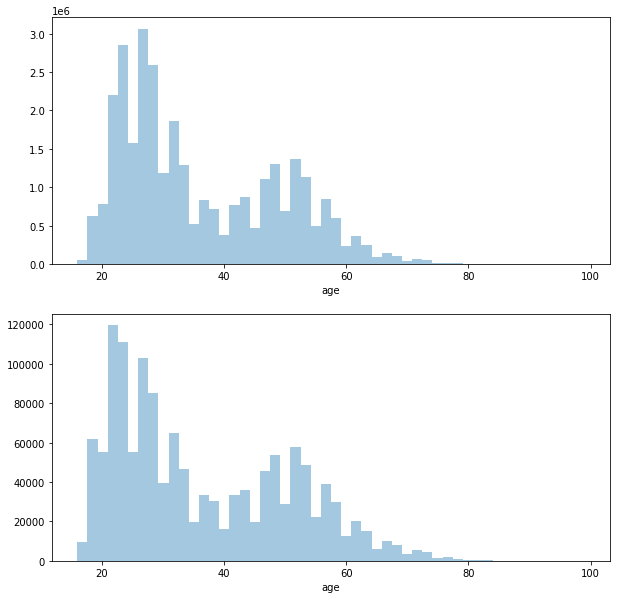

In [49]:

fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.distplot(merged_left['age'], hist=True, kde=False, label='Buying trends', 
             ax=ax[0])
sns.distplot(customer_data['age'], hist=True, kde=False, label='Customer', 
             ax=ax[1])

## Items bought categorized by type

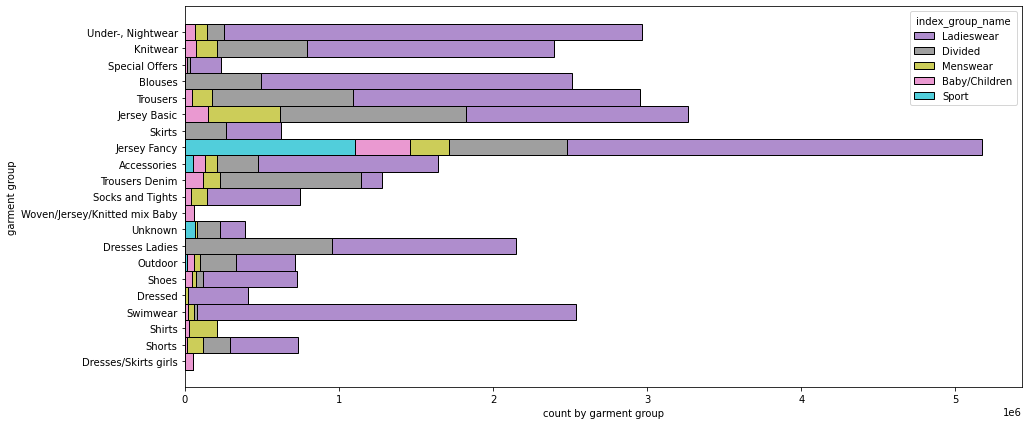

In [50]:
f, ax = plt.subplots(figsize=(15, 7))
palette = {
    'Ladieswear': 'tab:purple',
    'Divided': 'tab:gray',
    'Menswear': 'tab:olive',
    'Baby/Children': 'tab:pink',
    'Sport':'tab:cyan'
}
ax = sns.histplot(data=merged_left, y='garment_group_name', color='rocket', hue='index_group_name', palette=palette, multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

## Distribution of items available

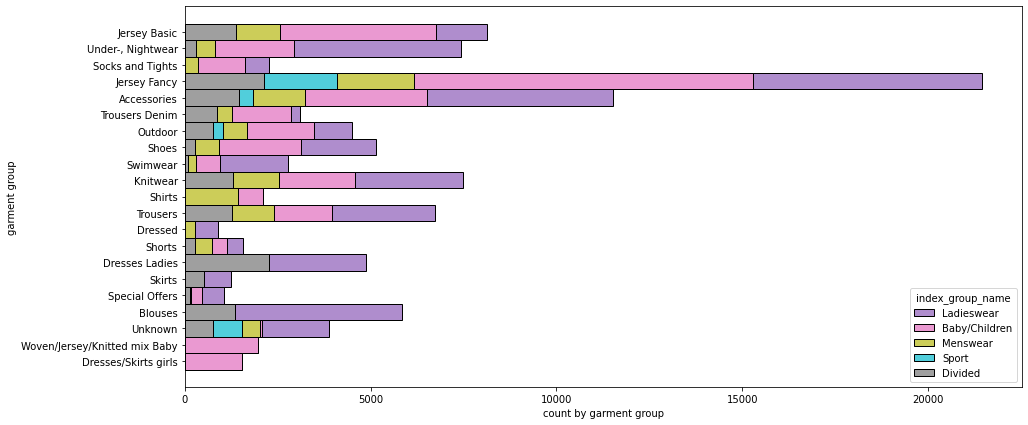

In [51]:
f, ax = plt.subplots(figsize=(15, 7))
palette = {
    'Ladieswear': 'tab:purple',
    'Divided': 'tab:gray',
    'Menswear': 'tab:olive',
    'Baby/Children': 'tab:pink',
    'Sport':'tab:cyan'
}
ax = sns.histplot(data=article_data, y='garment_group_name', color='orange', palette=palette, hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

## Color trend analysis on items bought 

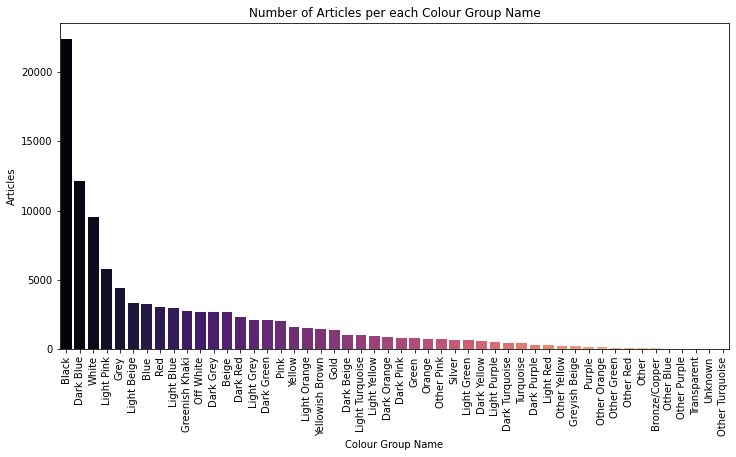

In [52]:
temp = merged_left.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", palette="magma", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

## Color trend analysis on store articles

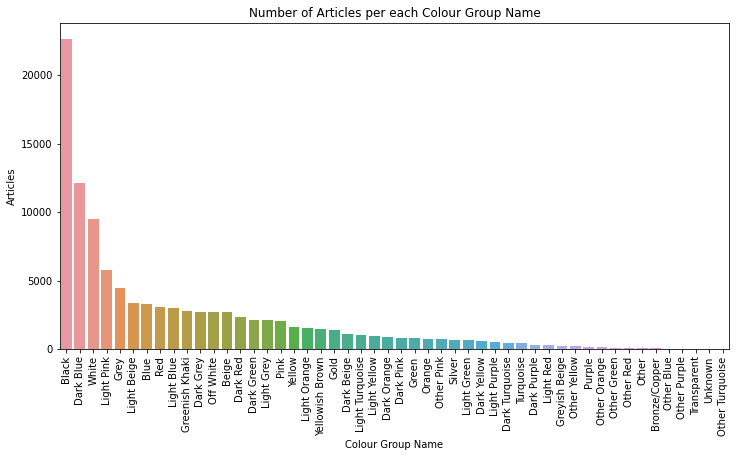

In [53]:
temp = article_data.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

## Season wise item distribution

In [66]:
merged_left['month'] =  pd.DatetimeIndex(merged_left['t_dat']).month
merged_left.loc[(merged_left["month"] >= 3) & (merged_left["month"] <= 5) , "season"] = "Spring"
merged_left.loc[(merged_left["month"] >= 6) & (merged_left["month"] <= 8) , "season"] = "Summer"
merged_left.loc[(merged_left["month"] >= 9) & (merged_left["month"] <= 11) , "season"] = "Autumn"
merged_left.loc[(merged_left["month"] == 12) , "season"] = "Winter"
merged_left.loc[(merged_left["month"] >= 1) & (merged_left["month"] <= 2) , "season"] = "Winter"

In [67]:
SA = merged_left.groupby(['season' , 'product_type_no' ,'product_type_name']).agg({'product_type_no': 'count'}).rename(columns={'product_type_no': 'quantity'}).reset_index()

In [68]:

palette = {
    'Trousers': 'navy',
    'Sweater': 'crimson',
    'Dress': 'darkviolet',
    'T-shirt': 'green',
    'Top':'lawngreen',
    'Bra':'linen',
    'Blouse':'olive',
    'Underwear bottom':'burlywood',
    'Leggings/Tights':'blue',
    'Vest top':'lightgray',
    'Shorts':'dodgerblue',
    'Bikini top':'mediumturquoise',
    'Swimwear bottom':'aquamarine' ,
    'Jacket':'darkred',
    'Shirt':'springgreen',
    'Cardigan':'tomato'
}

fig = px.pie(SA.loc[SA.season == "Winter"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Winter Top 10 Product',
             names='product_type_name',
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
             color='product_type_name',
             color_discrete_map=palette,
            height=450)

fig.show()

fig = px.pie(SA.loc[SA.season == "Summer"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Summer Top 10 Product',
             names='product_type_name',
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
             color='product_type_name',
             color_discrete_map=palette,
            height=450)

fig.show()

fig = px.pie(SA.loc[SA.season == "Spring"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Spring Top 10 Product',
             names='product_type_name',
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
             color='product_type_name',
             color_discrete_map=palette,
            height=450)

fig.show()

fig = px.pie(SA.loc[SA.season == "Autumn"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Autumn Top 10 Product',
             names='product_type_name',
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
             color='product_type_name',
             color_discrete_map=palette,
            height=450)

fig.show()

In [71]:
#merged_left["t_dat"] = pd.to_datetime(merged_left["t_dat"])
merged_left = merged_left[merged_left["t_dat"] >= "2020-03-01"]

In [72]:
SA = merged_left.groupby(['season' , 'product_type_no' ,'product_type_name']).agg({'product_type_no': 'count'}).rename(columns={'product_type_no': 'quantity'}).reset_index()

In [83]:
fig = px.pie(SA.loc[SA.season == "Autumn"].sort_values(by = 'quantity', ascending = False).head(10),
             values='quantity', 
             title='Autumn Top 10 Product',
             names='product_type_name',
             hover_data=['product_type_name'],
             labels={'product_type_name':'Product Type Name'},
             color='product_type_name',
             color_discrete_map=palette,
            height=450)

fig.show()

In [82]:
palette = {
    'Trousers': 'navy',
    'Sweater': 'crimson',
    'Dress': 'darkviolet',
    'T-shirt': 'green',
    'Top':'lawngreen',
    'Bra':'linen',
    'Blouse':'olive',
    'Underwear bottom':'burlywood',
    'Leggings/Tights':'blue',
    'Vest top':'lightgray',
    'Shorts':'dodgerblue',
    'Bikini top':'mediumturquoise',
    'Swimwear bottom':'aquamarine' ,
    'Jacket':'darkred',
    'Shirt':'palegreen',
    'Cardigan':'tomato'
}
